In [28]:
import sys
import subprocess
import warnings
warnings.filterwarnings("ignore")

# List of required packages
packages = [
    "pandas", "numpy", "matplotlib", "seaborn", "scikit-learn", "statsmodels",
    "arch", "tensorflow", "ta", "lime", "shap", "optuna", "pmdarima"
]

# Function to check and install missing packages
def install_missing_packages(packages):
    for package in packages:
        try:
            if package == 'scikit-learn':
                 __import__('sklearn')
            else:
                __import__(package)
        except ImportError:
            print(f"Installing {package}...")
            subprocess.check_call([sys.executable, "-m", "pip", "install", package])

# Install missing packages
install_missing_packages(packages)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import display

In [ ]:
# Set seeds for NumPy, Python, and TensorFlow (if using deep learning)
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)  # If using TensorFlow models

In [3]:
# Load stock price data
mag7_closing_prices = pd.read_csv("MAG7_closing_prices_2019_2024.csv", parse_dates=["Date"])
mag7_closing_prices.head()

Date       AAPL       AMZN      GOOGL        META       MSFT  \
0 2019-01-02  37.708595  76.956497  52.543530  135.163666  95.310539   
1 2019-01-03  33.952545  75.014000  51.088303  131.238678  91.804260   
2 2019-01-04  35.401958  78.769501  53.708797  137.425049  96.074005   
3 2019-01-07  35.323154  81.475502  53.601692  137.524658  96.196541   
4 2019-01-08  35.996529  82.829002  54.072487  141.987610  96.894028   

       NVDA       TSLA  
0  3.378090  20.674667  
1  3.173996  20.024000  
2  3.377347  21.179333  
3  3.556145  22.330667  
4  3.467613  22.356667

In [4]:
macro_data = pd.read_csv("macroeconomic_data_2019_2024.csv", parse_dates=["Date"])
macro_data.head()

Date    VIX  10Y_Treasury_Yield  Inflation_CPI
0 2019-01-01    NaN                 NaN        252.561
1 2019-01-02  23.22                2.66            NaN
2 2019-01-03  25.45                2.56            NaN
3 2019-01-04  21.38                2.67            NaN
4 2019-01-07  21.40                2.70            NaN

In [5]:
# Ensure data is sorted by date
mag7_closing_prices.sort_values("Date", inplace=True)
macro_data.sort_values("Date", inplace=True)

In [6]:
# Fill missing values in macroeconomic data
# Inflation_CPI is filled using forward-fill within the same month
macro_data["Inflation_CPI"] = macro_data.groupby(macro_data["Date"].dt.to_period("M"))["Inflation_CPI"].ffill()

# Fill missing values in VIX and 10Y Treasury Yield using linear interpolation
macro_data["VIX"] = macro_data["VIX"].interpolate(method="linear")
macro_data["10Y_Treasury_Yield"] = macro_data["10Y_Treasury_Yield"].interpolate(method="linear")

In [7]:
# Merge datasets
data = pd.merge(mag7_closing_prices, macro_data, on="Date", how="left")

In [8]:
data.head()

Date       AAPL       AMZN      GOOGL        META       MSFT  \
0 2019-01-02  37.708595  76.956497  52.543530  135.163666  95.310539   
1 2019-01-03  33.952545  75.014000  51.088303  131.238678  91.804260   
2 2019-01-04  35.401958  78.769501  53.708797  137.425049  96.074005   
3 2019-01-07  35.323154  81.475502  53.601692  137.524658  96.196541   
4 2019-01-08  35.996529  82.829002  54.072487  141.987610  96.894028   

       NVDA       TSLA    VIX  10Y_Treasury_Yield  Inflation_CPI  
0  3.378090  20.674667  23.22                2.66        252.561  
1  3.173996  20.024000  25.45                2.56        252.561  
2  3.377347  21.179333  21.38                2.67        252.561  
3  3.556145  22.330667  21.40                2.70        252.561  
4  3.467613  22.356667  20.47                2.73        252.561

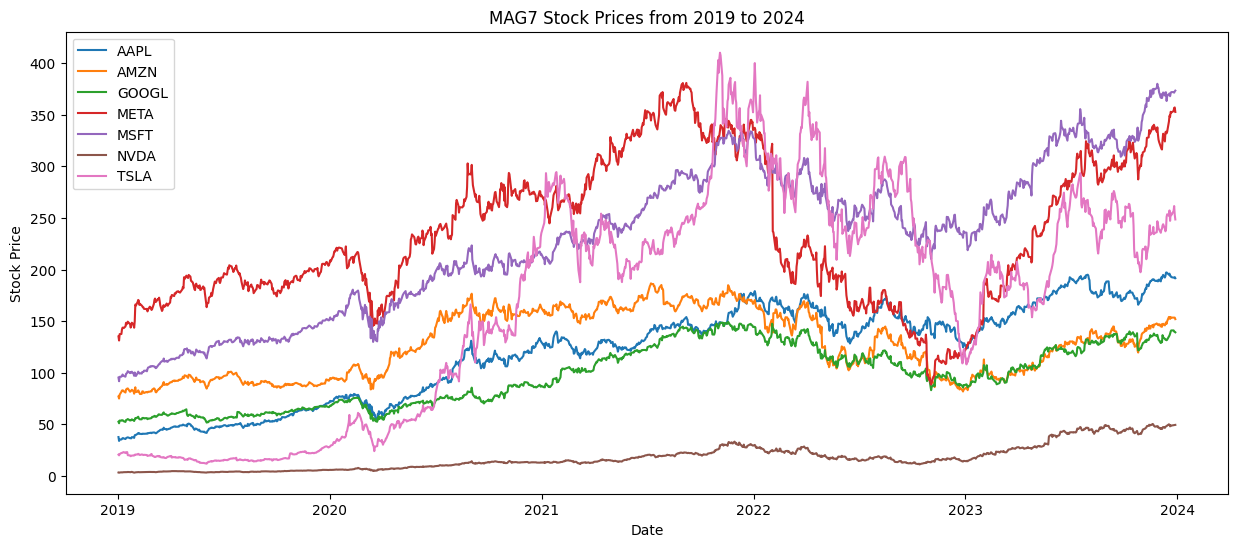

In [9]:
# Exploratory Data Analysis
# Plot all stock prices in a single chart
def plot_all_stocks(df, stock_columns=["AAPL", "AMZN", "GOOGL", "META", "MSFT", "NVDA", "TSLA"], title="Stock Prices Over Time"):
    plt.figure(figsize=(15, 6))
    
    for stock in stock_columns:
        plt.plot(df["Date"], df[stock], label=stock)

    plt.xlabel("Date")
    plt.ylabel("Stock Price")
    plt.title(title)
    plt.legend()
    plt.show()

# Call the function
plot_all_stocks(data, title="MAG7 Stock Prices from 2019 to 2024")

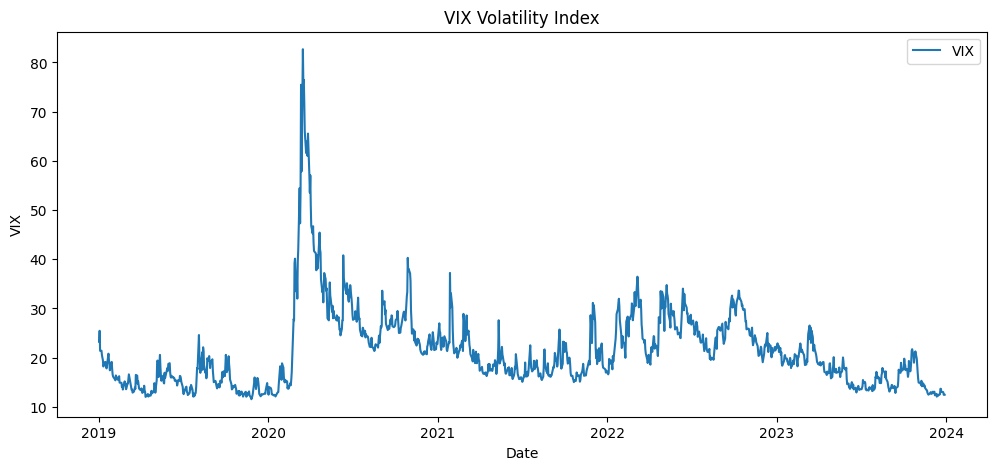

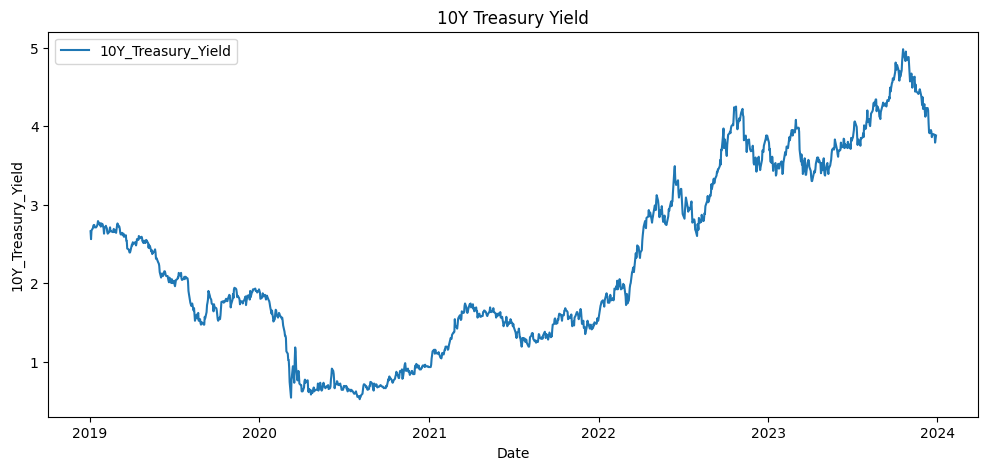

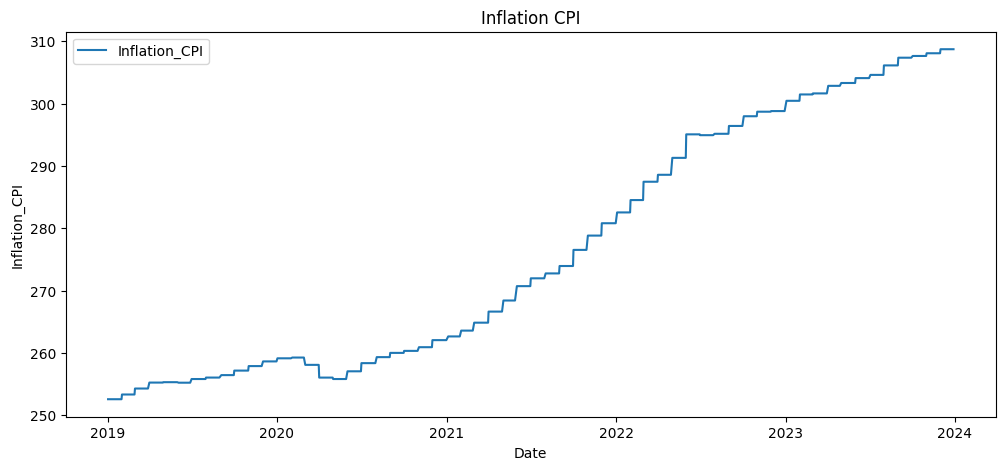

In [10]:
def plot_time_series(df, column, title):
    plt.figure(figsize=(12, 5))
    plt.plot(df["Date"], df[column], label=column)
    plt.xlabel("Date")
    plt.ylabel(column)
    plt.title(title)
    plt.legend()
    plt.show()

# Plot the macroeconomic indicators
plot_time_series(data, "VIX", "VIX Volatility Index")
plot_time_series(data, "10Y_Treasury_Yield", "10Y Treasury Yield")
plot_time_series(data, "Inflation_CPI", "Inflation CPI")

In [11]:
import ta  # Technical Analysis Library

# Compute Technical Indicators
def compute_technical_indicators(df, stock_columns):
    for stock in stock_columns:
        df[f"{stock}_SMA_50"] = ta.trend.sma_indicator(df[stock], window=50)
        df[f"{stock}_SMA_200"] = ta.trend.sma_indicator(df[stock], window=200)
        df[f"{stock}_RSI"] = ta.momentum.rsi(df[stock], window=14)
        df[f"{stock}_MACD"] = ta.trend.macd(df[stock])
        df[f"{stock}_Bollinger_High"] = ta.volatility.bollinger_hband(df[stock])
        df[f"{stock}_Bollinger_Low"] = ta.volatility.bollinger_lband(df[stock])
    return df

In [12]:
# Apply Feature Engineering
stock_columns = ["AAPL", "AMZN", "GOOGL", "META", "MSFT", "NVDA", "TSLA"]
data = compute_technical_indicators(data, stock_columns)

In [13]:
data.head()

Date       AAPL       AMZN      GOOGL        META       MSFT  \
0 2019-01-02  37.708595  76.956497  52.543530  135.163666  95.310539   
1 2019-01-03  33.952545  75.014000  51.088303  131.238678  91.804260   
2 2019-01-04  35.401958  78.769501  53.708797  137.425049  96.074005   
3 2019-01-07  35.323154  81.475502  53.601692  137.524658  96.196541   
4 2019-01-08  35.996529  82.829002  54.072487  141.987610  96.894028   

       NVDA       TSLA    VIX  10Y_Treasury_Yield  ...  NVDA_RSI  NVDA_MACD  \
0  3.378090  20.674667  23.22                2.66  ...       NaN        NaN   
1  3.173996  20.024000  25.45                2.56  ...       NaN        NaN   
2  3.377347  21.179333  21.38                2.67  ...       NaN        NaN   
3  3.556145  22.330667  21.40                2.70  ...       NaN        NaN   
4  3.467613  22.356667  20.47                2.73  ...       NaN        NaN   

   NVDA_Bollinger_High  NVDA_Bollinger_Low  TSLA_SMA_50  TSLA_SMA_200  \
0                  NaN                 NaN          NaN           NaN   
1                  NaN                 NaN          NaN           NaN   
2                  NaN                 NaN          NaN           NaN   
3                  NaN                 NaN          NaN           NaN   
4                  NaN                 NaN          NaN           NaN   

   TSLA_RSI  TSLA_MACD  TSLA_Bollinger_High  TSLA_Bollinger_Low  
0       NaN        NaN                  NaN                 NaN  
1       NaN        NaN                  NaN                 NaN  
2       NaN        NaN                  NaN                 NaN  
3       NaN        NaN                  NaN                 NaN  
4       NaN        NaN                  NaN                 NaN  

[5 rows x 53 columns]

In [14]:
# Identify technical indicator columns (those containing "_")
indicator_columns = [col for col in data.columns if "_" in col]

# Apply mean or median imputation only to technical indicators
data[indicator_columns] = data[indicator_columns].fillna(data[indicator_columns].mean())

# Alternative: Use median instead of mean
# data[indicator_columns] = data[indicator_columns].fillna(data[indicator_columns].median())

# This ensures that early values don't disrupt the trend

# Verify that NaNs are handled
data[indicator_columns].isna().sum()

10Y_Treasury_Yield      0
Inflation_CPI           0
AAPL_SMA_50             0
AAPL_SMA_200            0
AAPL_RSI                0
AAPL_MACD               0
AAPL_Bollinger_High     0
AAPL_Bollinger_Low      0
AMZN_SMA_50             0
AMZN_SMA_200            0
AMZN_RSI                0
AMZN_MACD               0
AMZN_Bollinger_High     0
AMZN_Bollinger_Low      0
GOOGL_SMA_50            0
GOOGL_SMA_200           0
GOOGL_RSI               0
GOOGL_MACD              0
GOOGL_Bollinger_High    0
GOOGL_Bollinger_Low     0
META_SMA_50             0
META_SMA_200            0
META_RSI                0
META_MACD               0
META_Bollinger_High     0
META_Bollinger_Low      0
MSFT_SMA_50             0
MSFT_SMA_200            0
MSFT_RSI                0
MSFT_MACD               0
MSFT_Bollinger_High     0
MSFT_Bollinger_Low      0
NVDA_SMA_50             0
NVDA_SMA_200            0
NVDA_RSI                0
NVDA_MACD               0
NVDA_Bollinger_High     0
NVDA_Bollinger_Low      0
TSLA_SMA_50 

In [15]:
from statsmodels.tsa.stattools import adfuller, kpss

# Stationarity Tests
def test_stationarity(df, column):
    adf_test = adfuller(df[column])
    kpss_test = kpss(df[column], regression="c")

    print(f"ADF Test for {column}: p-value = {adf_test[1]}")
    print(f"KPSS Test for {column}: p-value = {kpss_test[1]}")

In [16]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from arch import arch_model
from statsmodels.tsa.arima.model import ARIMA
import optuna
from pmdarima import auto_arima

# Function to automatically select the best ARIMA order
def auto_arima_order_selection(df, column):
    """
    Automatically selects the optimal ARIMA order using Auto-ARIMA.

    Parameters:
    - df: DataFrame containing the time-series data.
    - column: The column name of the time-series variable.

    Returns:
    - best_order: Tuple representing (p, d, q).
    """
    # Test stationarity before selecting the order
    test_stationarity(df, column)

    # Auto-ARIMA for order selection
    model = auto_arima(df[column], seasonal=False, stepwise=True, suppress_warnings=True)
    
    # Extract best order
    best_order = model.order
    print(f"Best ARIMA order for {column}: {best_order}")
    return best_order

# Function to optimize GARCH parameters using Optuna
def optimize_garch(df, column):
    """
    Uses Bayesian Optimization (Optuna) to find the best p and q for the GARCH model.

    Parameters:
    - df: DataFrame containing the time-series data.
    - column: The column name of the time-series variable.

    Returns:
    - best_p, best_q: Optimized GARCH order (p, q).
    """
    def objective(trial):
        p = trial.suggest_int("p", 1, 5)
        q = trial.suggest_int("q", 1, 5)
        
        # Fit GARCH model
        model = arch_model(df[column], vol="Garch", p=p, q=q)
        res = model.fit(disp="off")
        
        # Use AIC as the optimization criterion
        return res.aic

    study = optuna.create_study(direction="minimize")
    study.optimize(objective, n_trials=20)

    best_p = study.best_params["p"]
    best_q = study.best_params["q"]
    print(f"Best GARCH order for {column}: (p={best_p}, q={best_q})")

    return best_p, best_q


def plot_residuals(residuals):
    """
    Generates diagnostic plots for ARIMA residuals.

    Parameters:
    - residuals: Residuals from an ARIMA model.
    """
    fig, axes = plt.subplots(2, 2, figsize=(12, 8))

    # Time series plot of residuals
    axes[0, 0].plot(residuals, color='blue')
    axes[0, 0].set_title("Residuals Over Time")

    # Histogram of residuals
    sns.histplot(residuals, bins=30, kde=True, ax=axes[0, 1], color='purple')
    axes[0, 1].set_title("Residuals Histogram")

    # Autocorrelation function (ACF) plot
    plot_acf(residuals, ax=axes[1, 0])
    axes[1, 0].set_title("Autocorrelation of Residuals")

    # Partial autocorrelation function (PACF) plot
    plot_pacf(residuals, ax=axes[1, 1])
    axes[1, 1].set_title("Partial Autocorrelation of Residuals")

    plt.tight_layout()
    plt.show()

def plot_volatility_clustering(residuals):
    """
    Plots volatility clustering by visualizing squared residuals over time.

    Parameters:
    - residuals: Residuals from an ARIMA model.
    """
    plt.figure(figsize=(10, 5))
    plt.plot(residuals**2, color='red')
    plt.title("Volatility Clustering (Squared Residuals)")
    plt.xlabel("Time")
    plt.ylabel("Squared Residuals")
    plt.show()


def train_arima(df, column):
    """
    Trains an ARIMA model with automatic order selection.

    Parameters:
    - df: DataFrame containing time-series data.
    - column: Column name of the stock price data.

    Returns:
    - Fitted ARIMA model.
    - Residuals from the ARIMA model.
    """
    # Select best ARIMA order
    arima_order = auto_arima_order_selection(df, column)

    # Fit ARIMA model
    arima_model = ARIMA(df[column], order=arima_order)
    arima_fit = arima_model.fit()
    
    # Get residuals
    residuals = arima_fit.resid
    
    # Plot residual diagnostics
    plot_residuals(residuals)

    return arima_fit, residuals


def train_garch(residuals):
    """
    Trains a GARCH model with automatic order selection.

    Parameters:
    - residuals: Residuals from an ARIMA model.

    Returns:
    - Fitted GARCH model.
    """
    # Select best GARCH order
    best_p, best_q = optimize_garch(pd.DataFrame(residuals, columns=["Residuals"]), "Residuals")

    # Fit GARCH model
    garch_model = arch_model(residuals, vol="Garch", p=best_p, q=best_q)
    garch_fit = garch_model.fit(disp="off")

    # Plot volatility clustering
    plot_volatility_clustering(residuals)

    return garch_fit

In [17]:
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import LSTM, GRU, Dense, Dropout, Input, Attention, Concatenate, Layer
from tensorflow.keras.callbacks import EarlyStopping

In [18]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Normalize Data
def normalize_data(df, stock_columns):
    scaler = MinMaxScaler()
    df[stock_columns] = scaler.fit_transform(df[stock_columns])
    return df, scaler

In [19]:
# Prepare Data for LSTM/GRU
def prepare_lstm_data(df, target_column, feature_columns, time_steps=60):
    """
    Prepares time-series data for LSTM/GRU models.

    Parameters:
    - df: Pandas DataFrame, normalized dataset
    - target_column: str, column to predict
    - feature_columns: list, input features for LSTM
    - time_steps: int, number of time steps to use

    Returns:
    - X: NumPy array of shape (samples, time_steps, features)
    - y: NumPy array of shape (samples,)
    """
    X, y = [], []
    for i in range(len(df) - time_steps):
        X.append(df[feature_columns].iloc[i : i + time_steps].values)
        y.append(df.iloc[i + time_steps][target_column])
    
    return np.array(X), np.array(y)

In [20]:
# Attention Mechanism
class ScaledDotProductAttention(Layer):
    def __init__(self, **kwargs):
        super(ScaledDotProductAttention, self).__init__(**kwargs)

    def call(self, query, key, value):
        # Get the dimension of the key for scaling
        d_k = tf.cast(tf.shape(key)[-1], tf.float32)
        # Calculate the dot product attention scores
        scores = tf.matmul(query, key, transpose_b=True) / tf.math.sqrt(d_k)
        # Apply softmax to get the attention weights
        weights = tf.nn.softmax(scores, axis=-1)
        # Multiply the weights with the values
        output = tf.matmul(weights, value)
        return output

def attention_layer(inputs):
    # Create projections for query, key, and value using Dense layers.
    query = Dense(32, activation="relu")(inputs)
    key = Dense(32, activation="relu")(inputs)
    value = Dense(32, activation="relu")(inputs)
    
    # Create an instance of our custom attention layer
    attention = ScaledDotProductAttention()
    attention_output = attention(query, key, value)
    
    # Concatenate the original inputs with the attention output
    return Concatenate()([inputs, attention_output])

# Build Models
def build_lstm_model(input_shape):
    model = Sequential([
        LSTM(50, return_sequences=True, input_shape=input_shape),
        LSTM(50, return_sequences=False),
        Dense(25),
        Dense(1)
    ])
    model.compile(optimizer="adam", loss="mean_squared_error")
    return model

def build_gru_model(input_shape):
    model = Sequential([
        GRU(50, return_sequences=True, input_shape=input_shape),
        GRU(50, return_sequences=False),
        Dense(25),
        Dense(1)
    ])
    model.compile(optimizer="adam", loss="mean_squared_error")
    return model

def build_attention_lstm_model(input_shape):
    inputs = Input(shape=input_shape)
    x = LSTM(50, return_sequences=True)(inputs)
    x = LSTM(50, return_sequences=True)(x)
    x = attention_layer(x)
    x = LSTM(50, return_sequences=False)(x)
    x = Dense(25, activation="relu")(x)
    outputs = Dense(1)(x)
    model = Model(inputs, outputs)
    model.compile(optimizer="adam", loss="mean_squared_error")
    return model

def build_attention_gru_model(input_shape):
    inputs = Input(shape=input_shape)
    x = GRU(50, return_sequences=True)(inputs)
    x = GRU(50, return_sequences=True)(x)
    x = attention_layer(x)
    x = GRU(50, return_sequences=False)(x)
    x = Dense(25, activation="relu")(x)
    outputs = Dense(1)(x)
    model = Model(inputs, outputs)
    model.compile(optimizer="adam", loss="mean_squared_error")
    return model

# Train Model
def train_model(model, X_train, y_train, X_val, y_val, epochs=20, batch_size=32):
    early_stop = EarlyStopping(monitor="val_loss", patience=5)
    history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, 
                        validation_data=(X_val, y_val), callbacks=[early_stop])
    return history, model

In [21]:
from sklearn.metrics import mean_squared_error, r2_score

def evaluate_predictions(y_true, y_pred):
    """
    Evaluate predictions using statistical and financial metrics.
    
    Parameters:
    - y_true: Ground truth target values.
    - y_pred: Predicted target values (prices).
    
    Returns:
    - mse: Mean Squared Error.
    - rmse: Root Mean Squared Error.
    - r2: R² score.
    - sharpe_ratio: Annualized Sharpe Ratio based on predicted returns.
    """
    # Calculate MSE, RMSE, and R²
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    
    # Compute daily returns from predicted prices
    # Ensure predictions are flattened in case they're in a column vector shape.
    predicted_prices = y_pred.flatten()
    returns = np.diff(predicted_prices) / predicted_prices[:-1]
    
    # Compute Sharpe Ratio (assuming risk-free rate is zero and 252 trading days/year)
    if np.std(returns) != 0:
        sharpe_ratio = np.mean(returns) / np.std(returns) * np.sqrt(252)
    else:
        sharpe_ratio = np.nan

    # Print the evaluation metrics
    display("Evaluation Metrics:")
    display(f"MSE: {mse:.4f}")
    display(f"RMSE: {rmse:.4f}")
    display(f"R² Score: {r2:.4f}")
    display(f"Sharpe Ratio: {sharpe_ratio:.4f}")
    
    return mse, rmse, r2, sharpe_ratio

In [22]:
# Plot Predictions
def plot_predictions(y_test, y_pred, model_name):
    plt.figure(figsize=(10, 5))
    plt.plot(y_test, label="Actual Prices")
    plt.plot(y_pred, label="Predicted Prices")
    plt.xlabel("Time")
    plt.ylabel("Stock Price")
    plt.title(f"{model_name}: Actual vs Predicted Stock Prices")
    plt.legend()
    plt.show()

In [23]:
import shap
import lime
import lime.lime_tabular

# --- SHAP Explanation Function ---
# --- SHAP Explanation Function using GradientExplainer ---

def explain_with_shap(model, X_train, X_test, feature_names):
    """
    Uses SHAP's GradientExplainer to explain model predictions.
    """
    # Choose up to 100 samples from X_train as background data
    bg_samples = min(100, X_train.shape[0])
    background = X_train[np.random.choice(X_train.shape[0], bg_samples, replace=False)]
    
    # Create SHAP explainer
    explainer = shap.GradientExplainer(model, background)
    
    # Compute SHAP values for first 10 samples in X_test
    shap_values = explainer.shap_values(X_test[:10])

    # Debugging output
    print(f"shap_values shape: {np.shape(shap_values)}")  # (10, 60, 10, 1)
    print(f"X_test[:10] shape: {X_test[:10].shape}")      # (10, 60, 10)

    # Fix multiple outputs
    if isinstance(shap_values, list):
        shap_values = shap_values[0]  # Select first output

    # Reshape SHAP values to match X_test
    shap_values = np.squeeze(shap_values)  # Removes last dimension if (10, 60, 10, 1) -> (10, 60, 10)

    # Flatten time and feature dimensions: (samples, timesteps, features) → (samples, timesteps * features)
    shap_values_flat = shap_values.reshape(shap_values.shape[0], -1)
    X_test_flat = X_test[:10].reshape(X_test[:10].shape[0], -1)

    # Create new feature names: "feature_timestep"
    time_steps = X_test.shape[1]
    extended_feature_names = [f"{fn}_t{t}" for t in range(time_steps) for fn in feature_names]

    # Ensure number of feature names matches new shape
    assert shap_values_flat.shape[1] == len(extended_feature_names), "Feature name count mismatch!"

    # Plot SHAP summary
    shap.summary_plot(shap_values_flat, X_test_flat, feature_names=extended_feature_names)


# --- LIME Explanation Function ---
def explain_with_lime(model, X_train, X_test, feature_names):
    """
    Uses LIME Tabular Explainer to explain a single prediction.
    Because LIME expects 2D input, we flatten the time dimension.
    We create a prediction wrapper that reshapes flat inputs back to the original shape.
    """
    # Flatten the input: assume X_train has shape (samples, time_steps, features)
    time_steps = X_train.shape[1]
    n_features = X_train.shape[2]
    X_train_flat = X_train.reshape(X_train.shape[0], -1)
    X_test_flat = X_test.reshape(X_test.shape[0], -1)
    
    # Create a prediction wrapper that reshapes flat input back to (samples, time_steps, features)
    def model_predict_wrapper(x):
        x_reshaped = x.reshape(-1, time_steps, n_features)
        return model.predict(x_reshaped).flatten()
    
    # Create LIME Tabular Explainer
    # Generate feature names for each time step (e.g., "AAPL_t0", "AAPL_t1", ...)
    extended_feature_names = [f"{fn}_t{t}" for t in range(time_steps) for fn in feature_names]
    explainer = lime.lime_tabular.LimeTabularExplainer(
        X_train_flat,
        feature_names=extended_feature_names,
        mode='regression',
        verbose=True
    )
    
    # Explain the prediction for the first sample in X_test
    i = 0
    exp = explainer.explain_instance(X_test_flat[i], model_predict_wrapper, num_features=10)
    exp.show_in_notebook(show_table=True)

In [26]:
# --- Main Execution ---
def main(ticker, data):
    # stock_file = "MAG7_closing_prices_2019_2024.csv"
    # macro_file = "macroeconomic_data_2019_2024.csv"

    # Load data
    # data   load_data(stock_file, macro_file)
    data = data
    
    # Compute technical indicators
    # data = compute_technical_indicators(data, ticker)

    # Select features and normalize
    feature_columns = [ticker, f"{ticker}_SMA_50", f"{ticker}_SMA_200", f"{ticker}_RSI", f"{ticker}_MACD", 
                       f"{ticker}_Bollinger_High", f"{ticker}_Bollinger_Low", "VIX", "10Y_Treasury_Yield", "Inflation_CPI"]
    
    data, scaler = normalize_data(data, feature_columns)

    # Prepare data
    X, y = prepare_lstm_data(data, ticker, feature_columns)

    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

    # Train and evaluate ARIMA and GARCH models
    arima_model, residuals = train_arima(data, ticker)
    display(arima_model.summary())

    garch_model = train_garch(residuals)
    display(garch_model.summary())

    # Define models
    models = {
        "LSTM": build_lstm_model((X_train.shape[1], X_train.shape[2])),
        "GRU": build_gru_model((X_train.shape[1], X_train.shape[2])),
        "Attention LSTM": build_attention_lstm_model((X_train.shape[1], X_train.shape[2])),
        "Attention GRU": build_attention_gru_model((X_train.shape[1], X_train.shape[2]))
    }

    # Train and evaluate models
    for name, model in models.items():
        print(f"Training {name} for {ticker}...")
        _, trained_model = train_model(model, X_train, y_train, X_test, y_test)
        y_pred = trained_model.predict(X_test)
        evaluate_predictions(y_test, y_pred)
        plot_predictions(y_test, y_pred, name)
        
        # call SHAP:
        explain_with_shap(trained_model, X_train, X_test, feature_names=feature_columns)

        # call LIME:
        explain_with_lime(trained_model, X_train, X_test, feature_names=feature_columns)

Available 4-character ticker symbols:
1. AAPL
2. AMZN
3. META
4. MSFT
5. NVDA
6. TSLA


Select a ticker by entering its number:  2


ADF Test for AMZN: p-value = 0.3204766073713099
KPSS Test for AMZN: p-value = 0.01
Best ARIMA order for AMZN: (0, 1, 0)


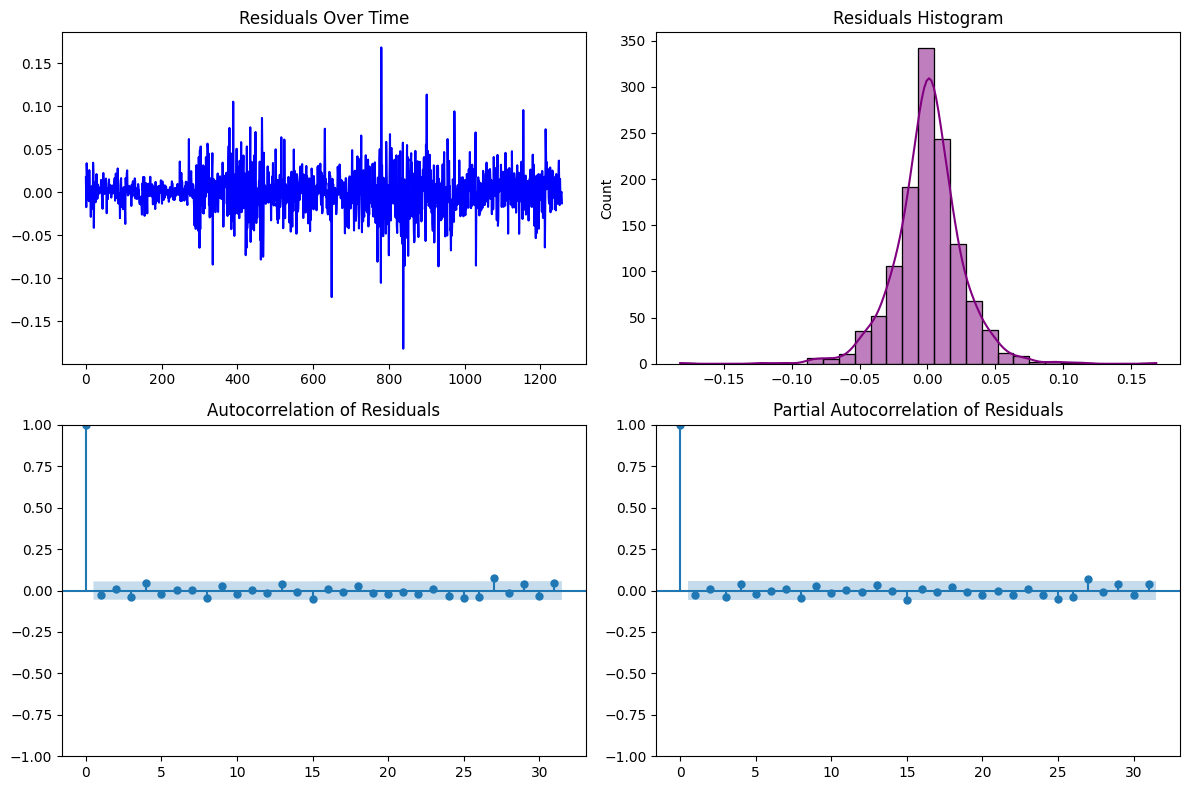

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   AMZN   No. Observations:                 1258
Model:                 ARIMA(0, 1, 0)   Log Likelihood                2835.399
Date:                Thu, 27 Mar 2025   AIC                          -5668.798
Time:                        01:38:00   BIC                          -5663.662
Sample:                             0   HQIC                         -5666.868
                               - 1258                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.0006   1.35e-05     47.626      0.000       0.001       0.001
===================================================================================
Ljung-Box (L1) (Q):                   0.86   Jarque-Bera (JB):              1435.73
Prob(Q):                              0.35   Prob(JB):                         0.00
Heteroskedasticity (H):               1.91   Skew:                            -0.14
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.23
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

[I 2025-03-27 01:38:00,750] A new study created in memory with name: no-name-ebbcd720-88bf-4df5-99f9-dce5a38d9379
[I 2025-03-27 01:38:00,871] Trial 0 finished with value: -5926.083845373801 and parameters: {'p': 2, 'q': 3}. Best is trial 0 with value: -5926.083845373801.
[I 2025-03-27 01:38:00,903] Trial 1 finished with value: -5924.953367737822 and parameters: {'p': 2, 'q': 1}. Best is trial 0 with value: -5926.083845373801.
[I 2025-03-27 01:38:00,943] Trial 2 finished with value: -5912.013363847433 and parameters: {'p': 4, 'q': 1}. Best is trial 0 with value: -5926.083845373801.
[I 2025-03-27 01:38:00,975] Trial 3 finished with value: -5932.827085034581 and parameters: {'p': 1, 'q': 1}. Best is trial 3 with value: -5932.827085034581.
[I 2025-03-27 01:38:01,220] Trial 4 finished with value: -5940.572363465668 and parameters: {'p': 4, 'q': 4}. Best is trial 4 with value: -5940.572363465668.
[I 2025-03-27 01:38:01,254] Trial 5 finished with value: -5924.953367737822 and parameters: {'p'

Best GARCH order for Residuals: (p=4, q=4)


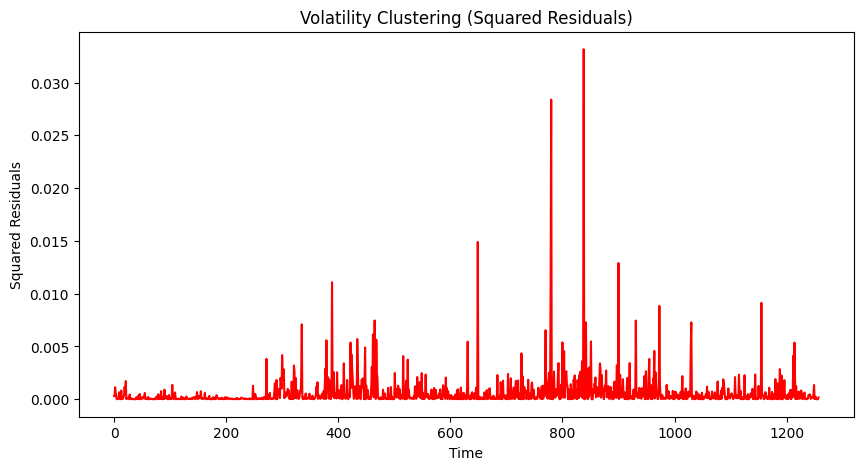

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                   None   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                2980.29
Distribution:                  Normal   AIC:                          -5940.57
Method:            Maximum Likelihood   BIC:                          -5889.20
                                        No. Observations:                 1258
Date:                Thu, Mar 27 2025   Df Residuals:                     1257
Time:                        01:38:04   Df Model:                            1
                                 Mean Model                                 
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu         1.2256e-03  5.663e-04      2.164  3.046e-02 [1.156e-04,2.336e-03]
                              Volatility Model                              
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega      1.6217e-05  9.660e-12  1.679e+06      0.000 [1.622e-05,1.622e-05]
alpha[1]       0.0966  6.465e-02      1.494      0.135  [-3.011e-02,  0.223]
alpha[2]       0.0442  5.873e-02      0.752      0.452  [-7.092e-02,  0.159]
alpha[3]       0.1434  9.091e-02      1.577      0.115  [-3.481e-02,  0.322]
alpha[4]   7.3142e-09  8.966e-02  8.158e-08      1.000     [ -0.176,  0.176]
beta[1]        0.0608      0.704  8.644e-02      0.931     [ -1.319,  1.440]
beta[2]    2.8323e-08      0.582  4.870e-08      1.000     [ -1.140,  1.140]
beta[3]        0.1356      0.454      0.299      0.765     [ -0.753,  1.025]
beta[4]        0.5137      0.395      1.301      0.193     [ -0.260,  1.287]
============================================================================

Covariance estimator: robust
"""

Training LSTM for AMZN...
Epoch 1/20
30/30 [==============================] - 18s 224ms/step - loss: 0.0517 - val_loss: 0.0593
Epoch 2/20
30/30 [==============================] - 4s 122ms/step - loss: 0.0050 - val_loss: 0.0175
Epoch 3/20
30/30 [==============================] - 4s 123ms/step - loss: 0.0033 - val_loss: 0.0141
Epoch 4/20
30/30 [==============================] - 4s 123ms/step - loss: 0.0027 - val_loss: 0.0128
Epoch 5/20
30/30 [==============================] - 4s 122ms/step - loss: 0.0024 - val_loss: 0.0062
Epoch 6/20
30/30 [==============================] - 4s 137ms/step - loss: 0.0022 - val_loss: 0.0123
Epoch 7/20
30/30 [==============================] - 4s 130ms/step - loss: 0.0022 - val_loss: 0.0081
Epoch 8/20
30/30 [==============================] - 4s 131ms/step - loss: 0.0021 - val_loss: 0.0098
Epoch 9/20
30/30 [==============================] - 4s 127ms/step - loss: 0.0021 - val_loss: 0.0079
Epoch 10/20
30/30 [==============================] - 4s 125ms/step - loss

'Evaluation Metrics:'

'MSE: 0.0038'

'RMSE: 0.0620'

'R² Score: 0.8537'

'Sharpe Ratio: 2.7965'

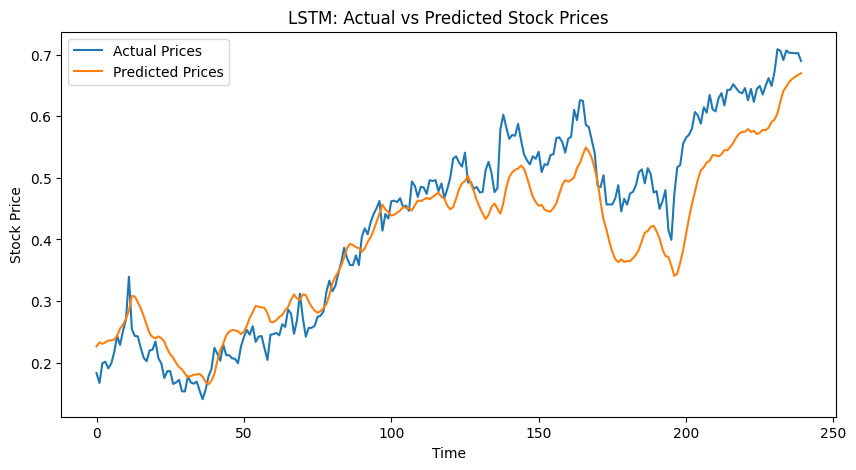

shap_values shape: (10, 60, 10, 1)
X_test[:10] shape: (10, 60, 10)


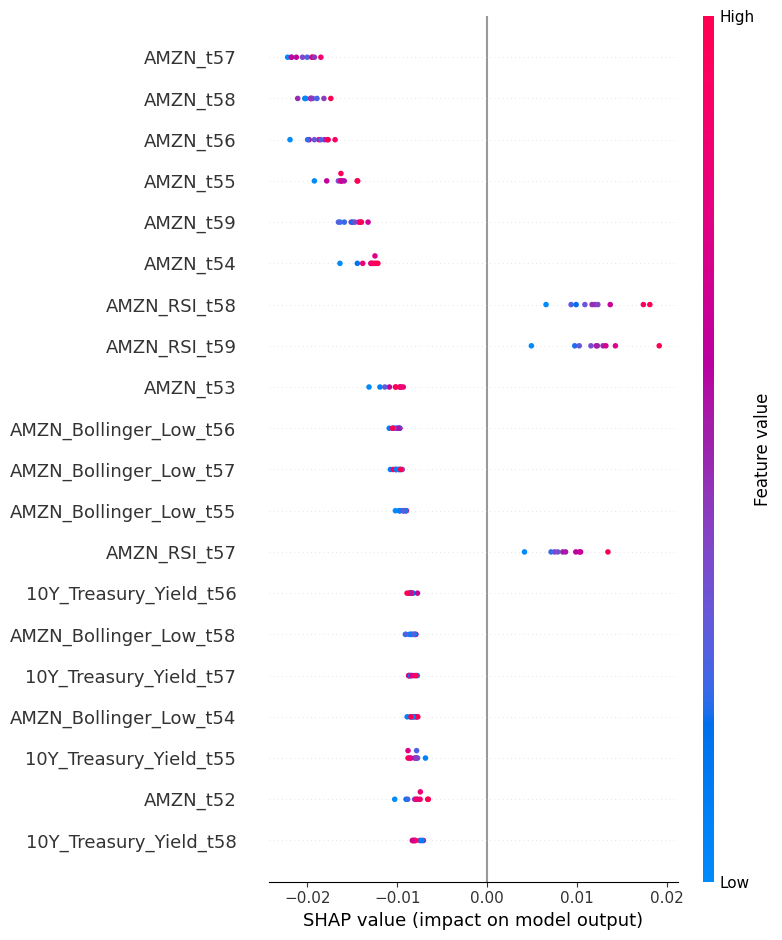

157/157 [==============================] - 6s 35ms/step
Intercept 0.5296429006170823
Prediction_local [0.49073606]
Right: 0.22665296


Training GRU for AMZN...
Epoch 1/20
30/30 [==============================] - 20s 226ms/step - loss: 0.0433 - val_loss: 0.0030
Epoch 2/20
30/30 [==============================] - 4s 142ms/step - loss: 0.0032 - val_loss: 0.0039
Epoch 3/20
30/30 [==============================] - 4s 140ms/step - loss: 0.0021 - val_loss: 0.0027
Epoch 4/20
30/30 [==============================] - 4s 142ms/step - loss: 0.0016 - val_loss: 0.0029
Epoch 5/20
30/30 [==============================] - 4s 143ms/step - loss: 0.0014 - val_loss: 0.0038
Epoch 6/20
30/30 [==============================] - 4s 142ms/step - loss: 0.0013 - val_loss: 0.0037
Epoch 7/20
30/30 [==============================] - 4s 143ms/step - loss: 0.0012 - val_loss: 0.0026
Epoch 8/20
30/30 [==============================] - 5s 160ms/step - loss: 0.0011 - val_loss: 0.0028
Epoch 9/20
30/30 [==============================] - 4s 141ms/step - loss: 0.0010 - val_loss: 0.0028
Epoch 10/20
30/30 [==============================] - 4s 142ms/step - loss:

'Evaluation Metrics:'

'MSE: 0.0020'

'RMSE: 0.0442'

'R² Score: 0.9256'

'Sharpe Ratio: 2.0040'

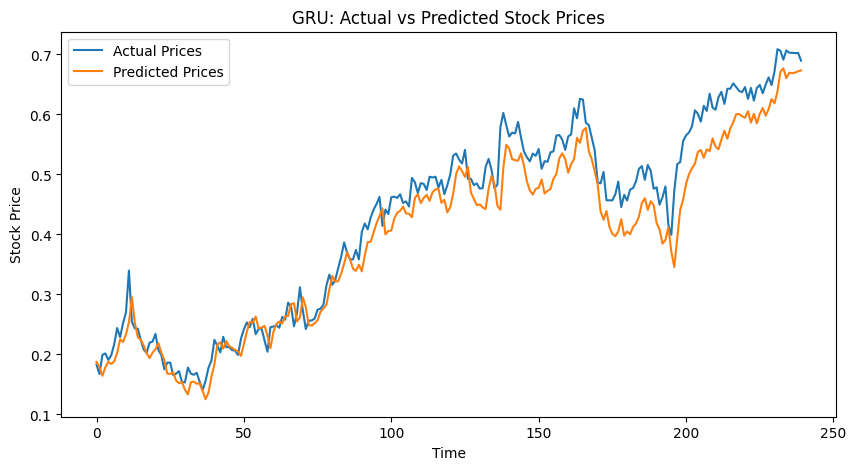

shap_values shape: (10, 60, 10, 1)
X_test[:10] shape: (10, 60, 10)


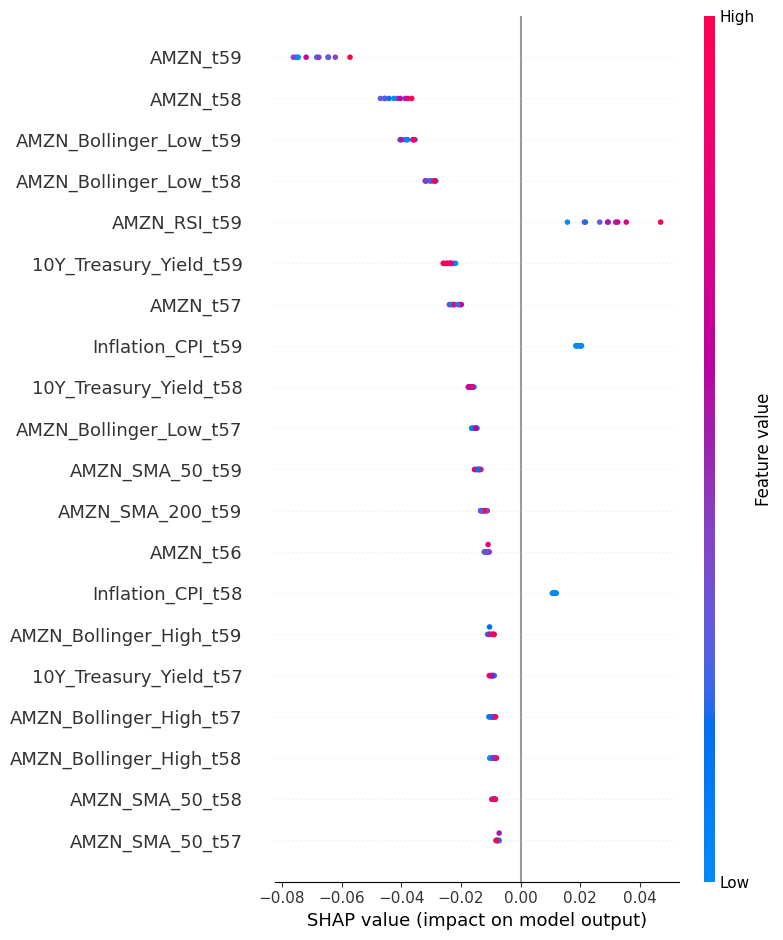

157/157 [==============================] - 6s 41ms/step
Intercept 0.5476866624191736
Prediction_local [0.37539834]
Right: 0.18762615


Training Attention LSTM for AMZN...
Epoch 1/20
30/30 [==============================] - 31s 376ms/step - loss: 0.0562 - val_loss: 0.0189
Epoch 2/20
30/30 [==============================] - 6s 200ms/step - loss: 0.0068 - val_loss: 0.0119
Epoch 3/20
30/30 [==============================] - 6s 194ms/step - loss: 0.0048 - val_loss: 0.0148
Epoch 4/20
30/30 [==============================] - 6s 193ms/step - loss: 0.0040 - val_loss: 0.0149
Epoch 5/20
30/30 [==============================] - 6s 193ms/step - loss: 0.0036 - val_loss: 0.0220
Epoch 6/20
30/30 [==============================] - 6s 200ms/step - loss: 0.0034 - val_loss: 0.0177
Epoch 7/20
8/8 [==============================] - 6s 56ms/step


'Evaluation Metrics:'

'MSE: 0.0192'

'RMSE: 0.1387'

'R² Score: 0.2684'

'Sharpe Ratio: 4.2094'

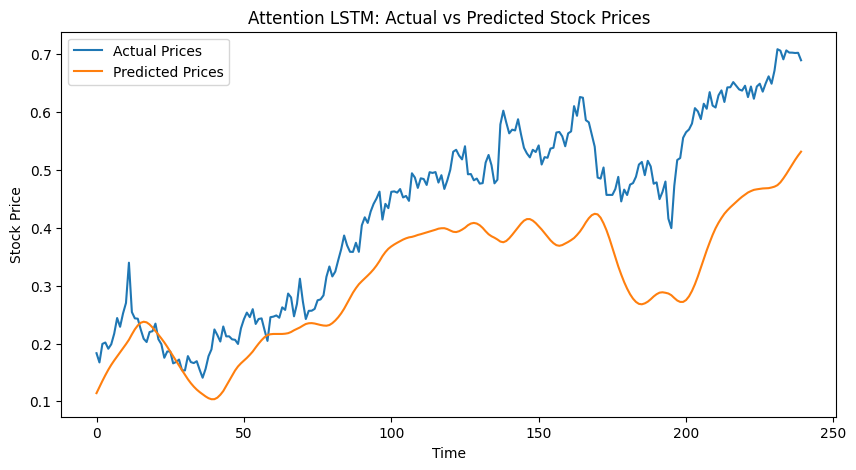

shap_values shape: (10, 60, 10, 1)
X_test[:10] shape: (10, 60, 10)


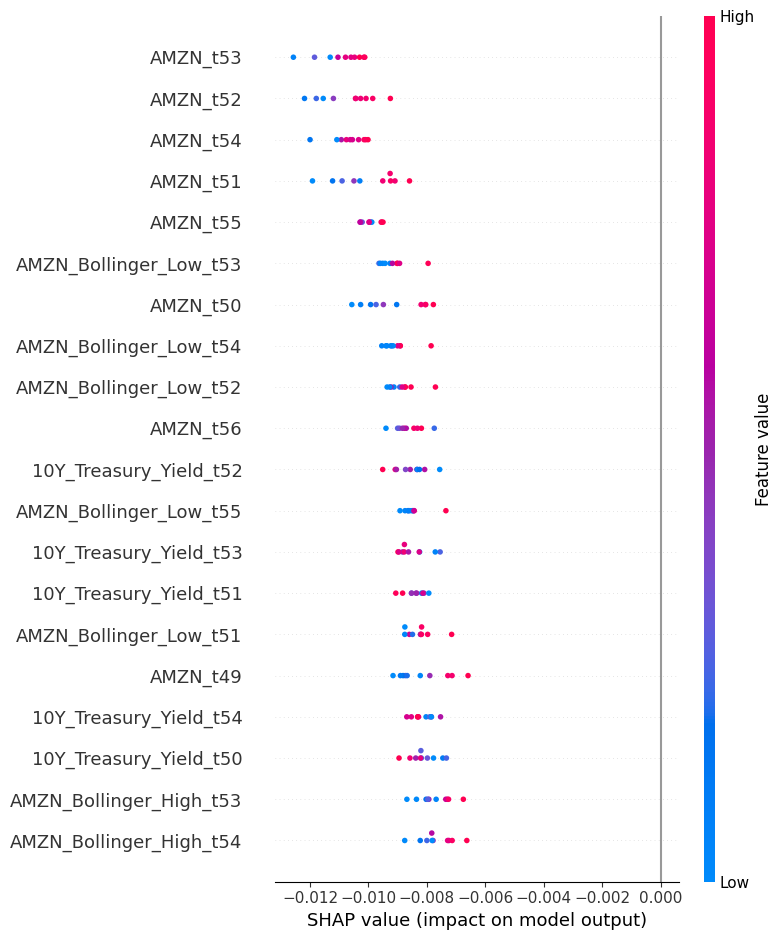

157/157 [==============================] - 9s 57ms/step
Intercept 0.5770888160969857
Prediction_local [0.44764135]
Right: 0.11423326


Training Attention GRU for AMZN...
Epoch 1/20
30/30 [==============================] - 31s 369ms/step - loss: 0.0270 - val_loss: 0.0327
Epoch 2/20
30/30 [==============================] - 7s 240ms/step - loss: 0.0044 - val_loss: 0.0115
Epoch 3/20
30/30 [==============================] - 7s 220ms/step - loss: 0.0023 - val_loss: 0.0051
Epoch 4/20
30/30 [==============================] - 7s 234ms/step - loss: 0.0018 - val_loss: 0.0062
Epoch 5/20
30/30 [==============================] - 7s 217ms/step - loss: 0.0014 - val_loss: 0.0025
Epoch 6/20
30/30 [==============================] - 6s 200ms/step - loss: 0.0014 - val_loss: 0.0026
Epoch 7/20
30/30 [==============================] - 6s 217ms/step - loss: 0.0012 - val_loss: 0.0036
Epoch 8/20
30/30 [==============================] - 7s 224ms/step - loss: 0.0013 - val_loss: 0.0021
Epoch 9/20
30/30 [==============================] - 7s 227ms/step - loss: 0.0010 - val_loss: 0.0018
Epoch 10/20
30/30 [==============================] - 7s 245ms/st

'Evaluation Metrics:'

'MSE: 0.0012'

'RMSE: 0.0343'

'R² Score: 0.9554'

'Sharpe Ratio: 1.9447'

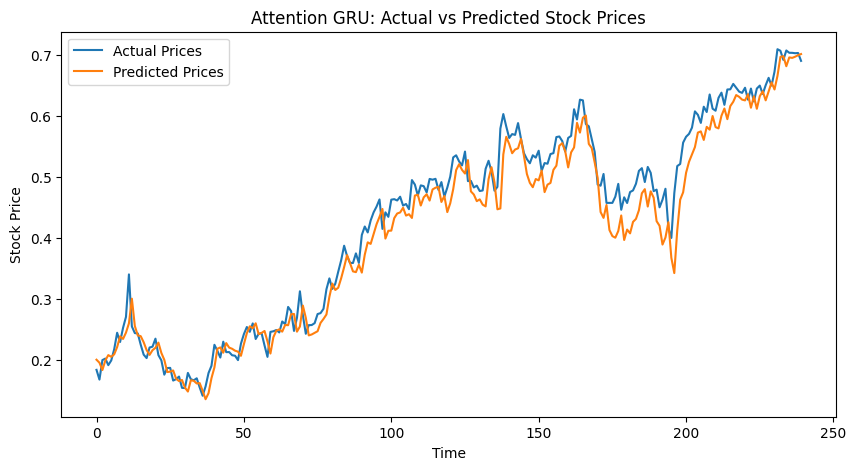

shap_values shape: (10, 60, 10, 1)
X_test[:10] shape: (10, 60, 10)


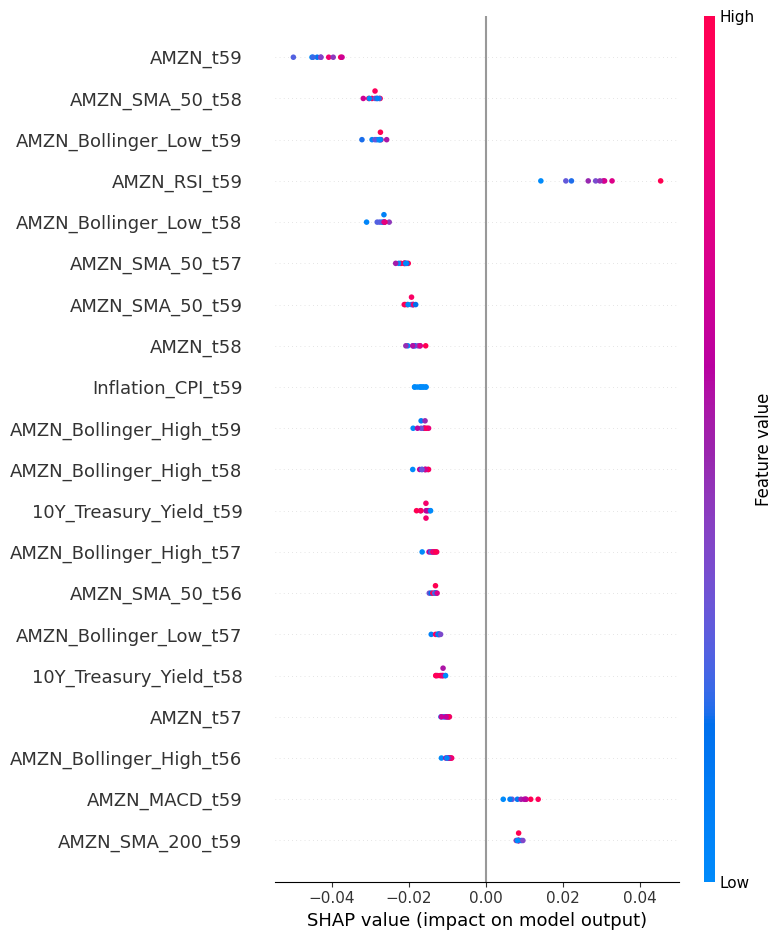

157/157 [==============================] - 10s 63ms/step
Intercept 0.5776157234512025
Prediction_local [0.38158511]
Right: 0.19988912


In [27]:
# Example: Assuming `data` is already loaded in your script
if __name__ == "__main__":

     # Extract available ticker symbols (excluding non-stock columns) & filtering to 4-character symbols
    available_tickers = [col for col in data.columns 
                         if len(col) == 4 and not col.startswith(("Date", "VIX", "10Y_Treasury_Yield", "Inflation_CPI"))]

    if not available_tickers:
        print("No valid 4-character ticker symbols found in the dataset.")
        exit(1)

    # Display available tickers with numbers
    print("Available 4-character ticker symbols:")
    for i, ticker in enumerate(available_tickers, start=1):
        print(f"{i}. {ticker}")

    # Ask user to pick a ticker by number
    while True:
        try:
            choice = int(input("Select a ticker by entering its number: "))
            if 1 <= choice <= len(available_tickers):
                ticker_symbol = available_tickers[choice - 1]
                break
            else:
                print("Invalid choice. Please enter a number from the list.")
        except ValueError:
            print("Invalid input. Please enter a number.")

    # Pass data explicitly
    main(ticker_symbol, data)